In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import keras
from keras.utils import to_categorical

In [2]:
# Creating Train and Test data frame using pandas 
train_df = pd.read_csv('sign_mnist_train.csv')
test_df = pd.read_csv('sign_mnist_test.csv')

In [3]:
# Visualizing the dataset
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [5]:
!pip install keras

In [6]:
!pip install tensorflow

In [7]:
#Preprocessing the data

train = np.array(train_df)  # Creating Numpy array
Train = train[:,1:]         # Taking everthing except the 1st column i.e, Label which is used for predictions
Train = Train/255           # Shaping the image
print("Shape of X_Train:",Train.shape)
X_train = np.reshape(Train,(27455,28,28,1))
y_train = np.array(train_df['label'])  # Creating Numpy array of Labels
y_train = to_categorical(y_train)
X_test = np.array(test_df)             # Creating Numpy array of Test dataframe
y_test = np.array(test_df['label'])    # Creating Numpy array of Test dataframe only Labels column
y_test = to_categorical(y_test)
X_Test = X_test[:,1:]      # Taking everthing except the 1st column
print("Shape of X_Test:",X_test.shape)
X_Test = np.reshape(X_Test,(7172,28,28,1))

Shape of X_Train: (27455, 784)
Shape of X_Test: (7172, 785)


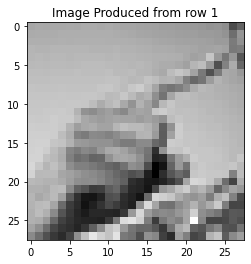

In [8]:
import matplotlib.pyplot as plt
plt.title('Image Produced from row 1')
plt.imshow(np.reshape(Train[1,:],(28,28)),'gray')

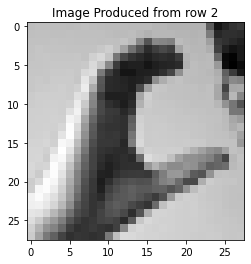

In [9]:
plt.title('Image Produced from row 2')
plt.imshow(np.reshape(Train[2,:],(28,28)),'gray')

In [10]:
from keras.models import Sequential
from keras.layers import MaxPooling2D, Conv2D, Flatten, Dropout, Dense
model = Sequential()
model.add(Conv2D(8, kernel_size=5, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(16, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(25, activation='softmax'))

model.compile(loss="categorical_crossentropy",optimizer = "adam", metrics=["accuracy"])
cnn = model.fit(X_train, y_train,validation_split = 0.3, epochs=30, verbose=1) 
# Increase epochs from 10 to 30 so that accuracy is enhanced

Epoch 1/30
601/601 [==============================] - 13s 20ms/step - loss: 2.3835 - accuracy: 0.3128 - val_loss: 0.7440 - val_accuracy: 0.7863
Epoch 2/30
601/601 [==============================] - 10s 17ms/step - loss: 0.6108 - accuracy: 0.8241 - val_loss: 0.2949 - val_accuracy: 0.9274
Epoch 3/30
601/601 [==============================] - 10s 17ms/step - loss: 0.2358 - accuracy: 0.9424 - val_loss: 0.1280 - val_accuracy: 0.9790
Epoch 4/30
601/601 [==============================] - 11s 18ms/step - loss: 0.0996 - accuracy: 0.9846 - val_loss: 0.0584 - val_accuracy: 0.9945
Epoch 5/30
601/601 [==============================] - 10s 17ms/step - loss: 0.0428 - accuracy: 0.9973 - val_loss: 0.0372 - val_accuracy: 0.9964
Epoch 6/30
601/601 [==============================] - 11s 18ms/step - loss: 0.0213 - accuracy: 0.9990 - val_loss: 0.0244 - val_accuracy: 0.9975
Epoch 7/30
601/601 [==============================] - 11s 18ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.0169 - val_accuracy:

          -----------Accuracy Graph-----------   


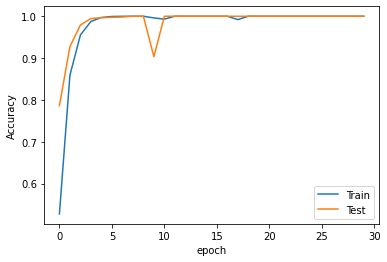

In [11]:
#To visualize the training process 

plt.plot(cnn.history['accuracy'])
plt.plot(cnn.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'])
print("          -----------Accuracy Graph-----------   ")
plt.show()

          -----------Loss Graph-----------   


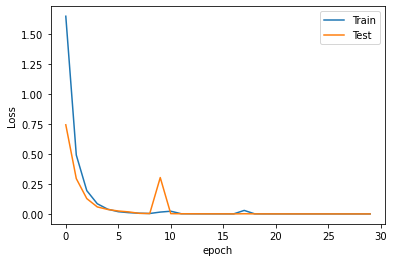

In [12]:
plt.plot(cnn.history['loss'])
plt.plot(cnn.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'])
print("          -----------Loss Graph-----------   ")
plt.show()

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 8)         208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 25)                10025     
Total params: 11,401
Trainable params: 11,401
Non-trainable params: 0
____________________________________________________

In [14]:
accuracy = model.evaluate(x=X_Test,y=y_test,batch_size=32)
print("Accuracy: ",accuracy[1]*100,"%")

225/225 [==============================] - 2s 9ms/step - loss: 188.5702 - accuracy: 0.8903
Accuracy:  89.02677297592163 %


In [15]:
prediction = model.predict(X_Test)
prediction = (prediction > 0.5) 

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)*100

89.02677077523703

In [17]:
# HMI Bonus Assignment
import cv2
import numpy as np
from keras import models

In [18]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install --user opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


In [20]:
model.save("CNN_sign_language.h5")

In [21]:
 def PRINT_LETTER(mod):
    Dict = {"A":0,"B":1,"C":2,"D":3,"E":4,"F":5,"G":6,"H":7,"I":8,"J":9,"K":10,"L":11,"M":12,"N":13,"O":14,"P":15,
            "Q":16,"R":17,"S":18,"T":19,"U":20,"V":21,"W":22,"X":23,"Y":24}
    Letters = {y:x for x,y in Dict.items()}
    return Letters[int(mod)];

In [22]:
m = "CNN_sign_language.h5"
CNN = models.load_model(m)

In [29]:
#Using cv2 to capture the frames using the webcamera
capture = cv2.VideoCapture(0)
org = (300,100)
#Taking Font
font = cv2.FONT_HERSHEY_COMPLEX
fontScale = 1
# Blue color in BGR
color = (0,0,255) # We have taken Blue to represent the character
# Line thickness of 2 px
thickness = 2

while True:
    # Storing the frame from the video capture and showing
    ret, frame = capture.read()
    frame = cv2.flip(frame , 1)
    R = frame[100:400, 320:620]
    
    R = cv2.cvtColor(R,cv2.COLOR_BGR2GRAY)
    R = cv2.resize(R,(28,28),interpolation = cv2.INTER_AREA)
    
    #Creating a copy of that frame
    copy = frame.copy()
    
    #Format - cv2.rectangle(image, start_point, end_point, color, thickness)
    cv2.rectangle(copy, (320,100) , (620,400) ,(0,255,0) , thickness)
    
    #Reshaping
    R = R.reshape(1,28,28,1)
    
    #Predicting the letter using our Model
    out = CNN.predict_classes(R,1)[0]
    letter = PRINT_LETTER(out)
    #Printing the letter
    print("Letter = ",letter)
    
    #Showing the letter on the Application Screen
    #cv2.putText(copy,letter,(200,100),cv2.FONT_HERSHEY_COMPLEX,2,(0,255,0),2)
    cv2.putText(copy,letter, org, font, fontScale, color, thickness)
    #Showing the Frame also
    cv2.imshow("Frame",copy)
    
    key=cv2.waitKey(1)   #Esc to Exit it
    if key%256 == 27:  
        break

#When While loop terminates the camera is turned off and closing all opened applications using cv2
capture.release()
cv2.destroyAllWindows()

Letter =  Y
Letter =  Y
Letter =  Y
Letter =  Y
Letter =  Y
Letter =  Y
Letter =  Y
Letter =  Y
Letter =  Y
Letter =  Y
Letter =  Y
Letter =  Y
Letter =  Y
Letter =  Y
Letter =  Y
Letter =  Y
Letter =  Y
Letter =  Y
Letter =  H
Letter =  H
Letter =  H
Letter =  H
Letter =  H
Letter =  H
Letter =  H
Letter =  H
Letter =  H
Letter =  H
Letter =  H
Letter =  H
Letter =  H
Letter =  H
Letter =  H
Letter =  H
Letter =  H
Letter =  H
Letter =  H
Letter =  H
Letter =  H
Letter =  H
Letter =  H
Letter =  H
Letter =  H
Letter =  H
Letter =  H
Letter =  G
Letter =  Q
Letter =  S
Letter =  S
Letter =  S
Letter =  P
Letter =  P
Letter =  P
Letter =  P
Letter =  P
Letter =  P
Letter =  P
Letter =  P
Letter =  P
Letter =  P
Letter =  Y
Letter =  Y
Letter =  Y
Letter =  Y
Letter =  Y
Letter =  Y
Letter =  Y
Letter =  Y
Letter =  Y
Letter =  Y
Letter =  Y
Letter =  Y
Letter =  Y
Letter =  Y
Letter =  Y
Letter =  Y
Letter =  Y
Letter =  Y
Letter =  Y
Letter =  Y
Letter =  Y
Letter =  Y
Letter =  Y
Lett